In [1]:
#Import basic EDA and Visualisation libraries

import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.linear_model import LinearRegression, LassoCV, RidgeCV, ElasticNetCV
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error, r2_score

In [2]:
housing_train = pd.read_csv('datasets/Train_Cleaned.csv')

In [3]:
housing_train.head()

,Id,Lot Frontage,Lot Area,Lot Shape,Land Slope,Mas Vnr Area,Bsmt Qual,Bsmt Cond,Bsmt Exposure,BsmtFin Type 1,...,Condition 1_PosN,Condition 1_RRAe,Condition 1_RRAn,Condition 1_RRNe,Condition 1_RRNn,Lot Config_Corner,Lot Config_CulDSac,Lot Config_FR2,Lot Config_FR3,Lot Config_Inside
0,109,68.0,13517,2,2,289.0,3,3,1,6,...,0,1,0,0,0,0,1,0,0,0
1,544,43.0,11492,2,2,132.0,4,3,1,6,...,0,0,0,0,0,0,1,0,0,0
2,153,68.0,7922,3,2,0.0,3,3,1,6,...,0,0,0,0,0,0,0,0,0,1
3,318,73.0,9802,3,2,0.0,4,3,1,1,...,0,0,0,0,0,0,0,0,0,1
4,255,82.0,14235,2,2,0.0,2,4,1,1,...,0,0,0,0,0,0,0,0,0,1


In [4]:
housing_train.set_index('Id', inplace = True)

In [5]:
housing_train.shape

(1961, 192)

In [6]:
housing_test = pd.read_csv('datasets/Test_Cleaned.csv')
housing_test.head()

,Id,MS SubClass,Lot Frontage,Lot Area,Lot Shape,Land Slope,Mas Vnr Area,Bsmt Qual,Bsmt Cond,Bsmt Exposure,...,Sale Type_COD,Sale Type_CWD,Sale Type_Con,Sale Type_ConLD,Sale Type_ConLI,Sale Type_ConLw,Sale Type_New,Sale Type_Oth,Sale Type_VWD,Sale Type_WD
0,2658,190,69.0,9142,3,2,0.0,2,3,1,...,0,0,0,0,0,0,0,0,0,1
1,2718,90,69.6,9662,2,2,0.0,4,3,1,...,0,0,0,0,0,0,0,0,0,1
2,2414,60,58.0,17104,2,2,0.0,4,4,3,...,0,0,0,0,0,0,1,0,0,0
3,1989,30,60.0,8520,3,2,0.0,3,3,1,...,0,0,0,0,0,0,0,0,0,1
4,625,20,69.6,9500,2,2,247.0,4,3,1,...,0,0,0,0,0,0,0,0,0,1


In [7]:
housing_test.set_index('Id', inplace = True)
housing_test.shape

(879, 177)

In [8]:
test_features = housing_test.columns.to_list()
test_features

['MS SubClass',
 'Lot Frontage',
 'Lot Area',
 'Lot Shape',
 'Land Slope',
 'Mas Vnr Area',
 'Bsmt Qual',
 'Bsmt Cond',
 'Bsmt Exposure',
 'BsmtFin Type 1',
 'BsmtFin SF 1',
 'Bsmt Unf SF',
 'Total Bsmt SF',
 'Heating QC',
 'Electrical',
 '1st Flr SF',
 '2nd Flr SF',
 'Gr Liv Area',
 'Bsmt Full Bath',
 'Bsmt Half Bath',
 'Full Bath',
 'Half Bath',
 'Bedroom AbvGr',
 'Kitchen AbvGr',
 'Kitchen Qual',
 'TotRms AbvGrd',
 'Functional',
 'Fireplaces',
 'Fireplace Qu',
 'Garage Finish',
 'Garage Cars',
 'Garage Area',
 'Paved Drive',
 'Wood Deck SF',
 'Pool QC',
 'Fence',
 'Mo Sold',
 'Garage Age',
 'Porch Combined SF',
 'House Age',
 'House Remod Yrs',
 'Exterior Qual/Cond',
 'Overall Qual/Cond',
 'Garage Qual/Cond',
 'Alley_Grvl',
 'Alley_Pave',
 'Bldg Type_1Fam',
 'Bldg Type_2fmCon',
 'Bldg Type_Duplex',
 'Bldg Type_Twnhs',
 'Bldg Type_TwnhsE',
 'Central Air_N',
 'Central Air_Y',
 'Condition 1_Artery',
 'Condition 1_Feedr',
 'Condition 1_Norm',
 'Condition 1_PosA',
 'Condition 1_PosN',
 '

In [9]:
train_features = housing_train.columns.to_list()
train_features

['Lot Frontage',
 'Lot Area',
 'Lot Shape',
 'Land Slope',
 'Mas Vnr Area',
 'Bsmt Qual',
 'Bsmt Cond',
 'Bsmt Exposure',
 'BsmtFin Type 1',
 'BsmtFin SF 1',
 'Bsmt Unf SF',
 'Total Bsmt SF',
 'Heating QC',
 'Electrical',
 '1st Flr SF',
 '2nd Flr SF',
 'Gr Liv Area',
 'Bsmt Full Bath',
 'Bsmt Half Bath',
 'Full Bath',
 'Half Bath',
 'Bedroom AbvGr',
 'Kitchen AbvGr',
 'Kitchen Qual',
 'TotRms AbvGrd',
 'Functional',
 'Fireplaces',
 'Fireplace Qu',
 'Garage Finish',
 'Garage Cars',
 'Garage Area',
 'Paved Drive',
 'Wood Deck SF',
 'Pool QC',
 'Fence',
 'Mo Sold',
 'SalePrice',
 'Porch Combined SF',
 'House Age',
 'House Remod Yrs',
 'Exterior Qual/Cond',
 'Overall Qual/Cond',
 'Garage Age',
 'Garage Qual/Cond',
 'Garage Type_2Types',
 'Garage Type_Attchd',
 'Garage Type_Basment',
 'Garage Type_BuiltIn',
 'Garage Type_CarPort',
 'Garage Type_Detchd',
 'Foundation_BrkTil',
 'Foundation_CBlock',
 'Foundation_PConc',
 'Foundation_Stone',
 'Foundation_Wood',
 'Land Contour_Bnk',
 'Land Conto

In [10]:
len(train_features)

192

In [11]:
len(test_features)

177

In [12]:
common_features = set(test_features).intersection(set(train_features))
common_features

{'1st Flr SF',
 '2nd Flr SF',
 'Alley_Grvl',
 'Alley_Pave',
 'Bedroom AbvGr',
 'Bldg Type_1Fam',
 'Bldg Type_2fmCon',
 'Bldg Type_Duplex',
 'Bldg Type_Twnhs',
 'Bldg Type_TwnhsE',
 'Bsmt Cond',
 'Bsmt Exposure',
 'Bsmt Full Bath',
 'Bsmt Half Bath',
 'Bsmt Qual',
 'Bsmt Unf SF',
 'BsmtFin SF 1',
 'BsmtFin Type 1',
 'Central Air_N',
 'Central Air_Y',
 'Condition 1_Artery',
 'Condition 1_Feedr',
 'Condition 1_Norm',
 'Condition 1_PosA',
 'Condition 1_PosN',
 'Condition 1_RRAe',
 'Condition 1_RRAn',
 'Condition 1_RRNe',
 'Condition 1_RRNn',
 'Electrical',
 'Exterior 1st_AsbShng',
 'Exterior 1st_AsphShn',
 'Exterior 1st_BrkComm',
 'Exterior 1st_BrkFace',
 'Exterior 1st_CemntBd',
 'Exterior 1st_HdBoard',
 'Exterior 1st_MetalSd',
 'Exterior 1st_Plywood',
 'Exterior 1st_Stucco',
 'Exterior 1st_VinylSd',
 'Exterior 1st_Wd Sdng',
 'Exterior 1st_WdShing',
 'Exterior 2nd_AsbShng',
 'Exterior 2nd_AsphShn',
 'Exterior 2nd_Brk Cmn',
 'Exterior 2nd_BrkFace',
 'Exterior 2nd_CBlock',
 'Exterior 2nd_Cme

In [13]:
len(common_features)

168

In [14]:
common_features = list(common_features)

In [15]:
X = housing_train[common_features]
X.shape

(1961, 168)

In [16]:
y = housing_train['SalePrice']
y.shape

(1961,)

In [17]:
X_train, X_val, y_train, y_val = train_test_split(X, y, random_state = 42)

In [18]:
X_train.shape

(1470, 168)

In [19]:
X_val.shape

(491, 168)

In [20]:
ss = StandardScaler()

X_train_scaled = ss.fit_transform(X_train)
X_val_scaled = ss.transform(X_val)

In [21]:
X_train_scaled.shape

(1470, 168)

In [22]:
lr = LinearRegression()
lr.fit(X_train_scaled, y_train)

LinearRegression()

In [23]:
lr_cv_scores = cross_val_score(lr, X_train_scaled, y_train, cv = 10)
lr_cv_scores.mean()

-3.2917149293048135e+26

In [24]:
ridge = RidgeCV(alphas = np.logspace(0, 3, 1500))
ridge.fit(X_train_scaled, y_train)
ridge.alpha_

159.02582053033834

In [25]:
ridge_cv_scores = cross_val_score(ridge, X_train_scaled, y_train, cv = 5)
ridge_cv_scores.mean()

0.8959294780968085

In [26]:
lasso = LassoCV(n_alphas = 200)
lasso.fit(X_train_scaled, y_train)

LassoCV(n_alphas=200)

In [27]:
lasso_cv_scores = cross_val_score(lasso, X_train_scaled, y_train, cv = 5)
lasso_cv_scores.mean()

0.898767342984438

In [28]:
len(lasso.coef_)

168

In [29]:
lasso_coef = pd.Series(lasso.coef_, index = X.columns).sort_values(ascending = False).to_frame(name = 'Coef')

In [30]:
lasso_coef.tail(15)

,Coef
Mas Vnr Type_BrkCmn,-684.860807
Condition 1_RRNn,-707.693410
Sale Type_COD,-728.010408
Bsmt Unf SF,-769.501318
Kitchen AbvGr,-1001.839478
Roof Style_Mansard,-1060.157320
House Remod Yrs,-1156.691162
Lot Config_Corner,-1361.626206
Exterior 2nd_HdBoard,-1364.174192
Neighborhood_NWAmes,-1585.268510


In [31]:
lasso_coef.head(25)

,Coef
Gr Liv Area,26182.762422
Overall Qual/Cond,10619.763951
Total Bsmt SF,8950.000828
BsmtFin SF 1,7561.156649
Neighborhood_NridgHt,6631.003380
Lot Area,6141.933709
Neighborhood_StoneBr,6111.254338
Mas Vnr Area,5956.523780
Kitchen Qual,5443.294254
Garage Area,5349.889687


In [32]:
coef_cond = ((lasso_coef['Coef'] > 3000) | (lasso_coef['Coef'] < (-1100)))

In [33]:
significant_coefs = lasso_coef[coef_cond]
significant_coefs

,Coef
Gr Liv Area,26182.762422
Overall Qual/Cond,10619.763951
Total Bsmt SF,8950.000828
BsmtFin SF 1,7561.156649
Neighborhood_NridgHt,6631.003380
Lot Area,6141.933709
Neighborhood_StoneBr,6111.254338
Mas Vnr Area,5956.523780
Kitchen Qual,5443.294254
Garage Area,5349.889687


In [34]:
significant_features = lasso_coef[coef_cond].index.to_list()
significant_features

['Gr Liv Area',
 'Overall Qual/Cond',
 'Total Bsmt SF',
 'BsmtFin SF 1',
 'Neighborhood_NridgHt',
 'Lot Area',
 'Neighborhood_StoneBr',
 'Mas Vnr Area',
 'Kitchen Qual',
 'Garage Area',
 'Bldg Type_1Fam',
 'Sale Type_New',
 'Bsmt Exposure',
 'Bsmt Qual',
 'Neighborhood_NoRidge',
 'Functional',
 'House Remod Yrs',
 'Lot Config_Corner',
 'Exterior 2nd_HdBoard',
 'Neighborhood_NWAmes',
 'Garage Qual/Cond',
 'Mas Vnr Type_BrkFace',
 'Foundation_CBlock',
 'Bedroom AbvGr',
 'House Age']

In [35]:
len(significant_features)

25

In [36]:
X_filtered = X[significant_features]

In [37]:
X_train, X_val, y_train, y_val = train_test_split(X_filtered, y, random_state = 42)

In [38]:
ss = StandardScaler()

X_train_scaled = ss.fit_transform(X_train)
X_val_scaled = ss.transform(X_val)

In [39]:
X_train_scaled.shape

(1470, 25)

In [40]:
lr = LinearRegression()
lr.fit(X_train_scaled, y_train)

LinearRegression()

In [41]:
lr_cv_scores = cross_val_score(lr, X_train_scaled, y_train, cv = 10)
lr_cv_scores.mean()

0.8968631650713249

In [42]:
lr_preds = lr.predict(X_val_scaled)
lr.score(X_val_scaled, y_val)

0.9063267247053003

In [43]:
np.sqrt(mean_squared_error(lr_preds, y_val))

22456.83260393543

In [44]:
ridge = RidgeCV(alphas = np.logspace(0, 3, 1500))
ridge.fit(X_train_scaled, y_train)
ridge.alpha_

13.14455326294057

In [45]:
ridge_cv_scores = cross_val_score(ridge, X_train_scaled, y_train, cv = 5)
ridge_cv_scores.mean()

0.8979454633224879

In [46]:
ridge_preds = ridge.predict(X_val_scaled)
ridge.score(X_val_scaled, y_val)

0.9066755683079072

In [47]:
np.sqrt(mean_squared_error(ridge_preds, y_val))

22414.978460112063

In [48]:
lasso = LassoCV(n_alphas = 200)
lasso.fit(X_train_scaled, y_train)

LassoCV(n_alphas=200)

In [49]:
lasso_cv_scores = cross_val_score(lasso, X_train_scaled, y_train, cv = 5)
lasso_cv_scores.mean()

0.8978376797144385

In [50]:
lasso_preds = lasso.predict(X_val_scaled)
lasso.score(X_val_scaled, y_val)

0.9066414719544624

In [51]:
np.sqrt(mean_squared_error(lasso_preds, y_val))

22419.07277507304

In [52]:
residuals = ridge_preds - y_val

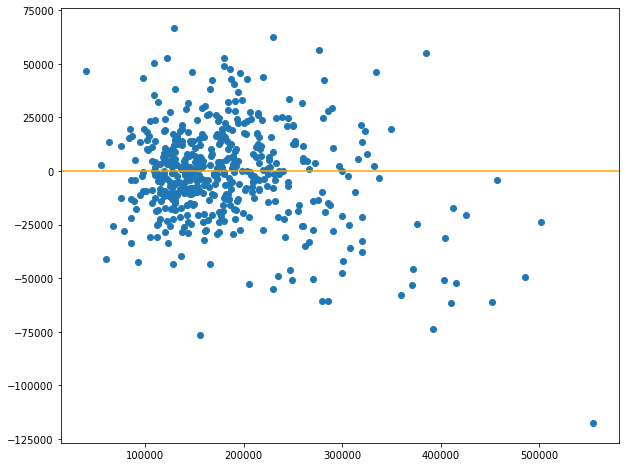

In [53]:
plt.figure(figsize =(10, 8))
plt.scatter(y_val, residuals)
plt.axhline(0, color = 'orange')

In [55]:
len(residuals)

491